In [2]:
import os
import pandas as pd
path_train = '../datasets/titanic/train.csv'
path_test = '../datasets/titanic/test.csv'
train_set = pd.read_csv(path_train)
test_set = pd.read_csv(path_test)

In [3]:
train = train_set.drop('Survived', axis=1)
train_labels = train_set['Survived'].copy()


**There are 4 categorical features:**
* Survived
* Name
* Sex
* Embarked

**There are 6 numeric features:**
* PassengerId
* Pclass
* Age
* SibSp
* Parch
* Fare

**There are 2 alphanumeric feateures**
* Ticket
* Cabin


In [4]:
train.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Glynn, Miss. Mary Agatha",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


* Drop columns with many NaN values (Cabin)

* Drop columns with non-sense values (Ticket & PassengerId)

* Fill Age with the median 

* Fill Embarked with the most frequent

**Maybe a new Feature such as Age/Pclass) that will attribute higher numbers to Old and Rich people and lower values to Young and Poor people**

Based on this we can have 4 catergories
In here we assume the Pclass they paid as a measurement of their economic status
The Pclass is also inverse correlated with the fare (so the class 1 pays higher fares; no surprise!)

* Young & Poor
* Young & Rich
* Old & Poor
* Old & Rich

In [6]:
from sklearn.impute import SimpleImputer

train_num = train[['Pclass','Age','SibSp','Parch','Fare']].copy()

#not to be used for now; will add later
#agepclass['Age/Pclass'] = train_num['Age'] / train_num['Pclass'] #higher age/fair means old and rich; lower means young and poor


imputer = SimpleImputer(strategy = 'median')
imputer.fit(train_num)
X = imputer.transform(train_num)
train_num = pd.DataFrame(X, columns=train_num.columns,index=train_num.index)
train_num.head()

,Pclass,Age,SibSp,Parch,Fare
0,3.0,22.0,1.0,0.0,7.2500
1,1.0,38.0,1.0,0.0,71.2833
2,3.0,26.0,0.0,0.0,7.9250
3,1.0,35.0,1.0,0.0,53.1000
4,3.0,35.0,0.0,0.0,8.0500


In [7]:
train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    float64
 1   Age     891 non-null    float64
 2   SibSp   891 non-null    float64
 3   Parch   891 non-null    float64
 4   Fare    891 non-null    float64
dtypes: float64(5)
memory usage: 34.9 KB


# Exploring the numerical features


PassengerId only represents the number of the entry (kind of like the index) so we are going to drop it

Analyse the numerical features

In [8]:
corr_matrix = train_num.corr()
corr_matrix['Pclass'].sort_values(ascending=False)

Pclass    1.000000
SibSp     0.083081
Parch     0.018443
Age      -0.339898
Fare     -0.549500
Name: Pclass, dtype: float64

The 'Age' , 'Fare' correlate well with Pclass but not the 'SibSp' or the 'Parch'

In [9]:
corr_matrix['SibSp'].sort_values(ascending=False)

SibSp     1.000000
Parch     0.414838
Fare      0.159651
Pclass    0.083081
Age      -0.233296
Name: SibSp, dtype: float64

The 'SibSp' (number of siblings per spouses) correlate well with the 'Parch' (number of parents per children)

# Exploring the categorical features

In [10]:
# Will not conside the name for this one. Too much work to sort that out

train_cat = train[['Sex','Embarked']].copy()
train_cat.fillna(method='ffill', axis=0, inplace=True)
train_cat.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [11]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
X = train_cat
train_cat_1hot = cat_encoder.fit_transform(train_cat)

# Pipeline for Numeric features

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])




train_num_tr = num_pipeline.fit_transform(train_num)

# Pipeline for Categorical features

In [13]:
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('encoder', OneHotEncoder())
])

# Pipeline for both Numeric and Categorical Features (final)

The problem here (i think) is the catergorical part of the pipeline because th OneHotEncoder() does not work with the NaN values of the Embarked that are in the 'train' dataset.

In [14]:
from sklearn.compose import ColumnTransformer
num_attribs = list(train_num)
cat_attribs = ['Sex','Embarked']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline,num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])

train_prepared = full_pipeline.fit_transform(train)

# Model testing & Comparison

In [15]:
'''
Testing RandomForesClassifier, SVM and KNneighborClassifier
'''
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


#objects
forest_clf = RandomForestClassifier()
svc_clf = SVC()
knn_clf = KNeighborsClassifier()

#fits ## maybe not needed
forest_clf.fit(train_prepared, train_labels)
svc_clf.fit(train_prepared, train_labels)
knn_clf.fit(train_prepared, train_labels)





# forest_pred = forest_reg.predict(train_prepared)
# forest_mse = mean_squared_error(train_labels, forest_pred)
# forest_rmse = np.sqrt(forest_mse)
# forest_rmse

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# Cross Val

In [16]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, train_prepared, train_labels, cv=10)
svc_scores = cross_val_score(svc_clf, train_prepared, train_labels, cv=10)
knn_scores = cross_val_score(knn_clf, train_prepared, train_labels, cv=10)





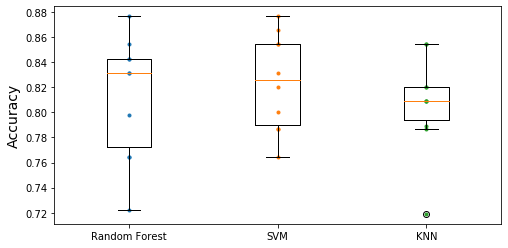

In [17]:
#plot scores
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

plt.plot([1]*10, forest_scores, ".")
plt.plot([2]*10, svc_scores, ".")
plt.plot([3]*10, knn_scores, ".")


plt.boxplot([forest_scores, svc_scores, knn_scores], labels=("Random Forest","SVM","KNN"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

In [18]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ',scores.mean())
    print('Standard deviation: ', scores.std())
    
display_scores(forest_scores)
display_scores(svc_scores)
display_scores(knn_scores)

Scores:  [0.72222222 0.79775281 0.76404494 0.83146067 0.87640449 0.85393258
 0.83146067 0.76404494 0.84269663 0.84269663]
Mean:  0.8126716604244694
Standard deviation:  0.046266810643450965
Scores:  [0.8        0.85393258 0.76404494 0.87640449 0.83146067 0.78651685
 0.82022472 0.78651685 0.86516854 0.85393258]
Mean:  0.8238202247191012
Standard deviation:  0.03644608527229355
Scores:  [0.78888889 0.82022472 0.71910112 0.80898876 0.85393258 0.80898876
 0.85393258 0.80898876 0.82022472 0.78651685]
Mean:  0.8069787765293382
Standard deviation:  0.03638786399015235


In [19]:
print('forest mean score: ',forest_scores.mean())
print('svc mean score: ',svc_scores.mean())
print('knn mean score: ',knn_scores.mean())



forest mean score:  0.8126716604244694
svc mean score:  0.8238202247191012
knn mean score:  0.8069787765293382


# Grid Search with SVC

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
              'C' : [0.5,1,2,4],
              'degree' : [1,2,3], 
              'gamma' : ['scale','auto'] }

svc_clf = SVC()

grid_search = GridSearchCV(svc_clf, param_grid, 
                          cv=5, 
                          scoring='neg_mean_squared_error',
                         return_train_score=True)

grid_search.fit(train_prepared, train_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.5, 1, 2, 4], 'degree': [1, 2, 3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [21]:
grid_search.best_params_

{'C': 2, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [22]:
grid_search.best_estimator_

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Final Score

In [23]:
final_model = grid_search.best_estimator_ 

X_test = test_set

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)



acc_svc_final = round(final_model.score(train_prepared, train_labels) * 100, 2)
acc_svc_final

84.51

# Submission

In [24]:
submission = pd.DataFrame({
        "PassengerId": test_set["PassengerId"],
        "Survived": final_predictions
    })
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [25]:
submission.to_csv('../datasets/titanic/submission.csv', index=False)

